In [1]:
from zne_entanglement_iqm import make_state_circuit, make_observables, run_zne, plot_zne

n = 3
state_circuit = make_state_circuit(n, kind="ghz")
observable = make_observables(n)["Z_all"]


In [ ]:
scales = [i for i in range (1,31, 2)]

zne_result = run_zne(
    state_circuit,
    observable,
    server_url=SERVER_URL,
    quantum_computer=QUANTUM_COMPUTER,
    shots=10000,
    scales=scales,
    fit_degree=3,
    optimization_level=1,
    seed_transpiler=1,
)

print("Noise scale → expectation")
for s, v in zip(zne_result.scales, zne_result.noisy_values):
    print(f"{s} → {v:.6f}")

print("ZNE extrapolated @ scale=0:", zne_result.zne_value)


Progress in queue:   0%|          | 0/1 [01:14<?, ?it/s]


Noise scale → expectation
1 → 0.041800
3 → 0.049800
5 → 0.042800
7 → 0.054800
9 → 0.055600
11 → 0.026600
13 → 0.034400
15 → 0.035800
17 → 0.025600
19 → 0.020800
21 → 0.043800
23 → 0.037000
25 → 0.034400
27 → 0.034000
29 → 0.034800
ZNE extrapolated @ scale=0: 0.04610988472312004


In [10]:
print("Noise scale → expectation value")
for s, v in zip(zne_result.scales, zne_result.noisy_values):
    print(f"  {s:>2} → {v:.6f}")

print("\nZero-noise extrapolated value:")
print(zne_result.zne_value)


Noise scale → expectation value
   1 → 0.041800
   3 → 0.049800
   5 → 0.042800
   7 → 0.054800
   9 → 0.055600
  11 → 0.026600
  13 → 0.034400
  15 → 0.035800
  17 → 0.025600
  19 → 0.020800
  21 → 0.043800
  23 → 0.037000
  25 → 0.034400
  27 → 0.034000
  29 → 0.034800

Zero-noise extrapolated value:
0.04610988472312004


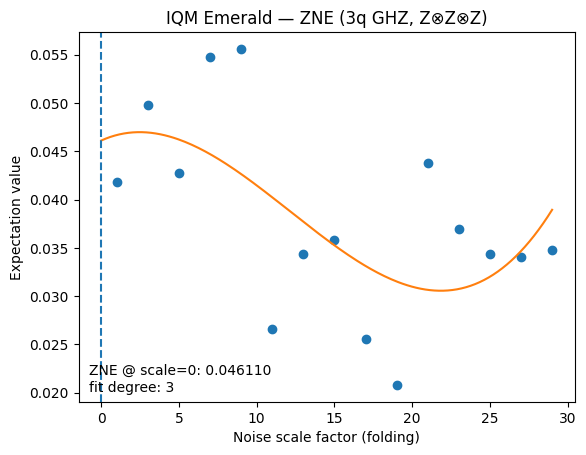

In [11]:
plot_zne(zne_result, title="IQM Emerald — ZNE (3q GHZ, Z⊗Z⊗Z)")
